In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# Enable altair's interactive visualization in jupyter notebook
alt.renderers.enable('notebook')
# Enable altair's local data server so notebook size doesn't get too large
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
df = pd.read_csv('data/master.csv')

In [4]:
# Reducing the features in the dataframe to only these needed
# This will lead to smaller sized Altair Charts
gender_df = df[['Year', 'Sex', 'Season', 'Sport', 'Event', 'NOC', 'region']]

In [5]:
gender_df.head()

,Year,Sex,Season,Sport,Event,NOC,region
0,1992,M,Summer,Basketball,Basketball Men's Basketball,CHN,China
1,2012,M,Summer,Judo,Judo Men's Extra-Lightweight,CHN,China
2,1920,M,Summer,Football,Football Men's Football,DEN,Denmark
3,1900,M,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,DEN,Denmark
4,1988,F,Winter,Speed Skating,Speed Skating Women's 500 metres,NED,Netherlands


In [6]:
summer_df = gender_df[gender_df['Season'] == 'Summer']
winter_df = gender_df[gender_df['Season'] == 'Winter']

In [7]:
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [8]:
# Find count for males and females for every summer olympics
df_grp = summer_df.groupby(['Year', 'Sex'])
df_grp = df_grp.size().reset_index(name='count')
df_grp.head()

,Year,Sex,count
0,1896,M,380
1,1900,F,33
2,1900,M,1903
3,1904,F,16
4,1904,M,1285


In [9]:
# Storing the percentage of female participation in a dictionary
perc = {}
for year in df_grp['Year'].unique():
    perc[year] = df_grp.loc[(df_grp['Year']==year) & (df_grp['Sex']=='F')]['count']/df_grp.loc[(df_grp['Year']==year)]['count'].sum()

# print(perc)

In [10]:
perc = {1896: 0, 
 1900: 0.017045,
 1904: 0.012298,
 1906: 0.006347,
 1908: 0.015156,
 1912: 0.021535,
 1920: 0.031221,
 1924: 0.046627,
 1928: 0.080929,
 1932: 0.116874,
 1936: 0.071934,
 1948: 0.098048,
 1952: 0.181016,
 1956: 0.174176,
 1960: 0.176746,
 1964: 0.175019,
 1968: 0.206917,
 1972: 0.21283, 
 1976: 0.25136,
 1980: 0.244194,
 1984: 0.258832,
 1988: 0.294342,
 1992: 0.317793,
 1996: 0.363425,
 2000: 0.392953,
 2004: 0.412557,
 2008: 0.427584,
 2012: 0.450077,
 2016: 0.454632}

In [29]:
perc_df = pd.DataFrame(perc.items(), columns=['Year', 'Percentage'])

In [12]:
# Multiplying each value by 100 to produce a percentage
# IGNORED, using Altair axis format
perc_df['Percentage'] = perc_df['Percentage'].apply(lambda x: x*100)
perc_df.head()

,Year,Percentage
0,1896,0.0000
1,1900,1.7045
2,1904,1.2298
3,1906,0.6347
4,1908,1.5156


In [30]:
chart = alt.Chart(perc_df).mark_line().encode(
    alt.X('Year:O'),
    alt.Y('Percentage:Q',axis=alt.Axis(format='%'))
)

In [31]:
chart = chart.properties(title='Rise in participation of Female Athletes in the Summer Olympics (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

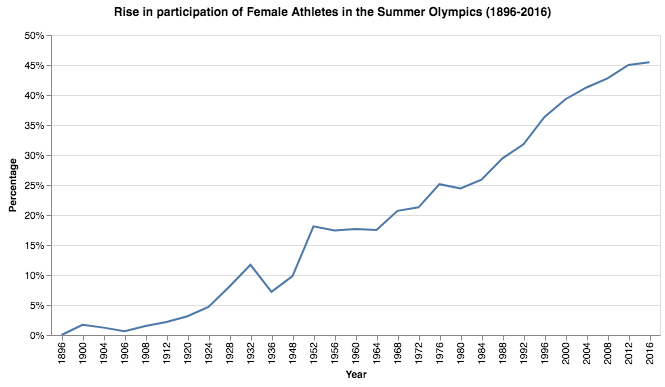

In [32]:
chart

In [33]:
chart.save('plots/gender/female_percentage.png', scale_factor=7.0)

In [21]:
chart = alt.Chart(summer_df).mark_area().encode(
    alt.X('Year:N'),
    alt.Y('count()'),
    alt.Color('Sex:N', title='Gender')
)

In [22]:
chart = chart.properties(title='Rise in participation of Female Athletes in the Summer Olympics (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

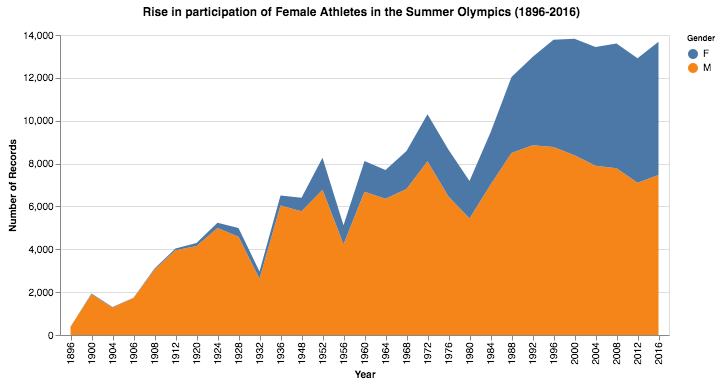

In [23]:
chart

In [24]:
chart.save('plots/gender/female_participation.png', scale_factor=7.0)

In [40]:
chart = alt.Chart(summer_df).mark_bar().encode(
    alt.X('Sex:N', title=''),
    alt.Y('count(Sex):Q', title='Number of Records'),
    alt.Color('Sex:N', title='Gender'),
    column='Year:N'
)

In [47]:
chart = chart.properties(title='Year Wise participation of Male and Female Athletes in the Summer Olympics (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

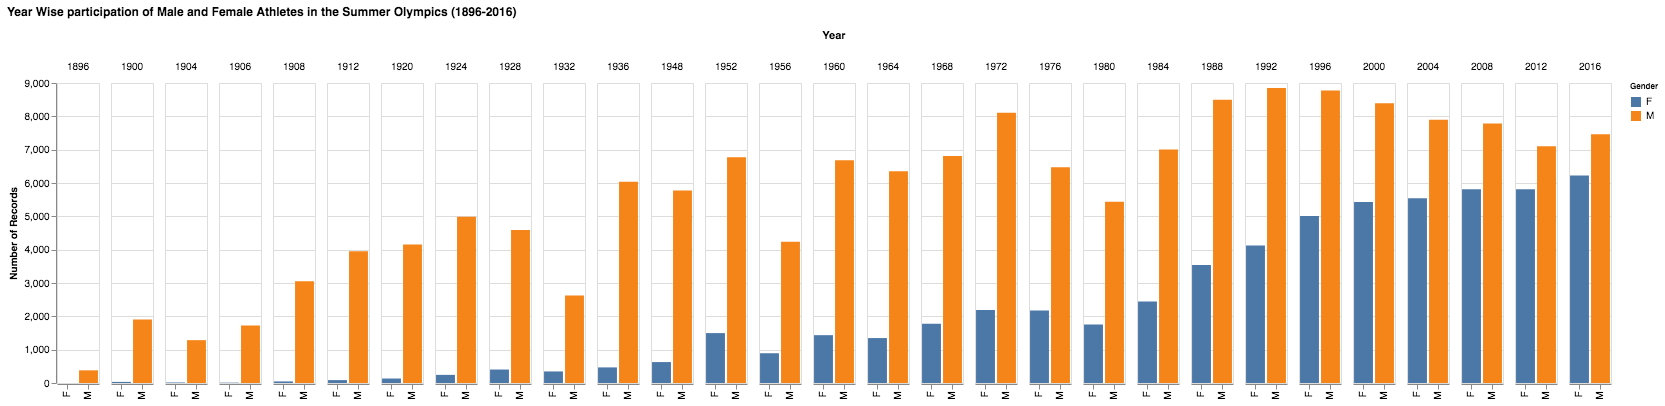

In [48]:
chart

In [49]:
chart.save('plots/gender/male_female_participation.png', scale_factor=7.0)

In [ ]:
alt.Chart(winter_df).mark_area().encode(
    alt.X('Year:O'),
    alt.Y('count()', title='Gender'),
    alt.Color('Sex:N')
)

In [ ]:
alt.Chart(winter_df).mark_bar().encode(
    x='Sex:N',
    y='count(Sex):Q',
    color='Sex:N',
    column='Year:N'
)

In [ ]:
# Currently the equestrian events are the only Olympic events in which women compete one-on-one against men.
# The 2016 Rio Olympic Games has both the highest ever number of women competitors and the highest percentage, with women making up about 45 percent of the total participants, according to the IOC.

In [ ]:
s = summer_df.groupby(['Year', 'Sex']).agg({'Event': 'count'})
s.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))